
#  **601 Final Project on Contract Opportunities for the Years 2020 to 2023**
    By: Sree Nandha , Yeshwanth Thalapaneni, Yeshwanth Sai, Vikas Reddy Venkannagari
---

*   Dataset Location : https://sam.gov/data-services/Contract%20Opportunities/Archived%20Data?privacy=Public

---


 Hypothesis: 

1. There is an increase in contract awarded by dollar amount overall for all federal agencies.
2. Is the Department of Defense's award amount consistently increasing over the years, supporting the hypothesis of sustained growth in contract awards for the department?
3. Department of Defense posted the highest number of contracts over the last several years comparing with other departments.
4. Department of Defense has the highest dollar amount awarded over the last several years comparing with other departments.
5. There is an increase in number of contract posted for Department of Commerce over the last several years
6. Over the last several years, Census Bureau posted the same number of contract over the years

Team Questions : 

1. Which Awardee is awarded the contract with the highest dollar amount in 2023 in Census Bureau?
2. Which Awardee is awarded the contract with the highest dollar amount in 2020 in Department of Commerce?
3. Which Awardee is awarded the contract with the highest dollar amount in 2022 in Department of Defense?
4. Which is the most common used NAICS code for FY2021?


# Importing Libraries

In [1]:
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 10)  # Change 10 to the total number of rows you want to display
pd.reset_option('display.max_columns')
pd.set_option('display.float_format', '{:.0f}'.format)

import math
import numpy as np
import re
import time

from scipy.stats import ttest_1samp

# Data Loading 

In [2]:
# Reading the data 
start_time = time.time()
chunk_size = 100000  # Adjust the chunk size

df2020 = pd.concat([chunk for chunk in pd.read_csv('https://umbc.box.com/shared/static/91lmieun5u1e8p87wmlnuglyzl3xm91h.csv', encoding='latin1', on_bad_lines='skip', low_memory=True, chunksize=chunk_size)])
print("2020 file processed")
df2021 = pd.concat([chunk for chunk in pd.read_csv('https://umbc.box.com/shared/static/7emabgf9ck2afprmrl459jnk30ewmabj.csv', encoding='latin1', on_bad_lines='skip', low_memory=True, chunksize=chunk_size)])
print("2021 file processed")
df2022 = pd.concat([chunk for chunk in pd.read_csv('https://umbc.box.com/shared/static/tdkmuj86qm2uxhvjlfkav2i3pnx9fkoa.csv', encoding='latin1', on_bad_lines='skip', low_memory=True, chunksize=chunk_size)])
print("2022 file processed")
df2023 = pd.concat([chunk for chunk in pd.read_csv('https://umbc.box.com/shared/static/au8h309qptksq5wlem6g5onn5v13fsrc.csv', encoding='latin1', on_bad_lines='skip', low_memory=True, chunksize=chunk_size)])
print("2023 file processed")

C:\Users\VIKAS\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (17,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\VIKAS\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2020 file processed
2021 file processed


C:\Users\VIKAS\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (27,34,38,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\VIKAS\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (17,34,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\VIKAS\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (27,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2022 file processed


C:\Users\VIKAS\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (34,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\VIKAS\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\VIKAS\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (27,34,44) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2023 file processed


# Data PreProcessing

## Removing columns not so important

In [3]:
columns_not_important = ["Link", "Description", "CountryCode", "ZipCode","City", "State",'PrimaryContactTitle', 'PrimaryContactFullname', 'PrimaryContactEmail',
       'PrimaryContactPhone', 'PrimaryContactFax', 'SecondaryContactTitle',
       'SecondaryContactFullname', 'SecondaryContactEmail',
       'SecondaryContactPhone', 'SecondaryContactFax', 'PopStreetAddress', 'PopCity', 'PopState', 'PopZip', 'PopCountry']


The columns that were removed, including "Link," "Description," "CountryCode," "ZipCode," "City," "State," and various contact details, seem to contain information that is either redundant, not relevant to the analysis, or sensitive in nature. By excluding these columns from the dataframes (df2020 and df2021), the dataset is streamlined to focus on the essential information for the specific analysis or task at hand. This process of feature selection can enhance the efficiency of data processing, reduce noise, and protect sensitive information, ultimately leading to a more manageable and targeted dataset for analysis or modeling purposes.

In [4]:
# Remove columns from df2020 in place
df2020.drop(columns=columns_not_important, inplace=True)

# Remove columns from df2021 in place
df2021.drop(columns=columns_not_important, inplace=True)

# Remove columns from df2020 in place
df2022.drop(columns=columns_not_important, inplace=True)

# Remove columns from df2021 in place
df2023.drop(columns=columns_not_important, inplace=True)

## Removing dupicate rows

In [5]:
unique20 = df2020.loc[~df2020.duplicated(subset=['Title'])]
unique20 = unique20.loc[~unique20.duplicated(subset=['Sol#'])]
unique20.reset_index(drop=True, inplace=True)
unique20

,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,ResponseDeadLine,NaicsCode,ClassificationCode,Active,AwardNumber,AwardDate,Award$,Awardee,OrganizationType,AdditionalInfoLink
0,425a9edc53e84373aeb2826644ac97b6,66--Airfield Friction Tester,W50S9C-20-Q-0003,DEPT OF DEFENSE,21,DEPT OF THE ARMY,2100,W7N4 USPFO ACTIVITY VT ARNG,W912LN,2020-09-30 23:57:23.594-04,...,NaN,NaN,66,No,W50S9C20P0026,2020-09-30,75706.1,"HALLIDAY TECHNOLOGIES INC [DUNS: 011448375],10...",OFFICE,NaN
1,cbdb7b8ee8de4179b25c36e3b4819a2c,65--COVID 19 cleaning supplies,1018031080_01,"STATE, DEPARTMENT OF",19,"STATE, DEPARTMENT OF",1900,ACQUISITIONS - AQM MOMENTUM,19AQMM,2020-09-30 23:53:02.228-04,...,NaN,NaN,65,No,19AQMM20P2326,2020-09-30,11876.98,"KAN HERITAGE INC [DUNS: 079669146],7620 FOLSOM...",OFFICE,NaN
2,c8609373b0734f1aa5d9dcdf7e26f4c6,58--Voyager DSV,1019022491_01,"STATE, DEPARTMENT OF",19,"STATE, DEPARTMENT OF",1900,ACQUISITIONS - AQM MOMENTUM,19AQMM,2020-09-30 23:48:57.306-04,...,NaN,NaN,58,No,19AQMM20P2312,2020-09-30,110867.0,LIGHTFOOT COMMUNICATIONS LLC [DUNS: 943850268]...,OFFICE,NaN
3,c07957305b754b35957e539f98150dcf,Contract Opportunity Lease of Office Space wit...,20-REG11_8VA2699,GENERAL SERVICES ADMINISTRATION,47,PUBLIC BUILDINGS SERVICE,4740,PBS R11 LEASING DIV,47PM99,2020-09-30 23:45:27.966-04,...,2020-10-20T19:30:00-04:00,531120,NaN,No,NaN,NaN,NaN,NaN,OFFICE,NaN
4,50463c77de6c4ebdbd7f1e8be833f4fb,6540-- VISN 5 Eyeglass Contract,36C24520R0012,"VETERANS AFFAIRS, DEPARTMENT OF",36,"VETERANS AFFAIRS, DEPARTMENT OF",3600,245-NETWORK CONTRACT OFFICE 5 (36C245),36C245,2020-09-30 23:43:15.213-04,...,2020-10-15T14:00:00-04:00,339115,6540,No,NaN,NaN,NaN,null,OFFICE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129668,548290107b82144aca385588d713bb94,Dedicated Internet Access (DIA) Circuits,19GE5019R0067,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-01 02:20:39-04,...,NaN,517311,D,No,19GE5019D0024,2019-09-30,"$15,060,392",Middle East Internet Co. - Cyberia ISP King Fa...,NaN,NaN
129669,d28aec9e05aa7d72638e892168be6828,External Book Drop for Library,FA527019Q0034,DEPT OF DEFENSE,57,DEPT OF THE AIR FORCE,5700,FA5270 18 CONS PK,FA5270,2019-10-01 01:52:01-04,...,NaN,519120,99,No,FA527019PA113,2019-09-30,"$20,660",American Engineering Corporation,OFFICE,NaN
129670,3a64a113453c028658f718e2aece8256,"Hangar/AMU, Group HQ/Squadron Operations/Wareh...",W912HV18R0008,DEPT OF DEFENSE,21,DEPT OF THE ARMY,2100,US ARMY ENGINEER DISTRICT JPN,W912HV,2019-10-01 01:25:13-04,...,2019-01-30T23:59:00-05:00,236220,Y,No,NaN,NaN,NaN,NaN,OFFICE,NaN
129671,c032095afb5cc89a5ea8bc406fc41337,"Repair Dining Hall, B-230, Gwangju AB",W90VN918R0069,DEPT OF DEFENSE,21,DEPT OF THE ARMY,NaN,646TH SUPPORT DETACHMENT,W90VN9,2019-10-01 00:09:50-04,...,NaN,236220,Z,No,W90VN9-19-F-0012,2019-09-30,"$3,024,568.75",Youngjin Construction Inc,OFFICE,NaN


In [6]:
unique21 = df2021.loc[~df2021.duplicated(subset=['Title'])]
unique21 = unique21.loc[~unique21.duplicated(subset=['Sol#'])]
unique21.reset_index(drop=True, inplace=True)
unique21

,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,ResponseDeadLine,NaicsCode,ClassificationCode,Active,AwardNumber,AwardDate,Award$,Awardee,OrganizationType,AdditionalInfoLink
0,b21b71fa248b4cb7a845554fbdccfb3f,89--FCI Phoenix - Q1 FY22 Religious Meal Menu,15B60822Q00000001_01,"JUSTICE, DEPARTMENT OF",15,FEDERAL PRISON SYSTEM / BUREAU OF PRISONS,1540,FCI PHOENIX,15B608,2021-09-30 23:58:49.215-04,...,NaN,NaN,8945,No,15B60821PXA100007,2021-09-30,11834,"L A FOODS LLC [DUNS: 624860334],5115 Clareton ...",OFFICE,NaN
1,6b83d00cea8f401480dabbbccddb8ae0,Growth Chamber - Award Notice,12505B21Q0220-Award,"AGRICULTURE, DEPARTMENT OF",12,AGRICULTURAL RESEARCH SERVICE,12H2,USDA ARS MWA AAO ACQ/PER PROP,12505B,2021-09-30 23:58:03.26-04,...,NaN,334516,6640,No,12505B21P0266,2021-09-30,13123,Percival Scientific Incorporated IA 50220-8140...,OFFICE,NaN
2,7523c6a91efd4924a18849cd69e05143,Microplate Reader Spectrophotometer - Award No...,12505B21Q0191-Award,"AGRICULTURE, DEPARTMENT OF",12,AGRICULTURAL RESEARCH SERVICE,12H2,USDA ARS MWA AAO ACQ/PER PROP,12505B,2021-09-30 23:55:25.523-04,...,NaN,334516,6630,No,12505B21P0265,2021-09-29,12714,"Biotek Instruments, Inc. VT 05404-1356 USA",OFFICE,NaN
3,6d51e36bd72f41dd9bb24d9f2314afad,37--Grounds Mower,W50S84-21-Q-0010,DEPT OF DEFENSE,21,DEPT OF THE ARMY,2100,W7NF USPFO ACTIVITY MI ARNG,W912JB,2021-09-30 23:52:54.99-04,...,NaN,NaN,3750,No,W50S8421P0039,2021-09-30,69465,"SPARTAN DISTRIBUTORS, INC [DUNS: 006545388],48...",OFFICE,NaN
4,b99b1ddaad6c4b27b1e3e49e22be8d76,Drone with Imager and Camera - Award Notice,12505B21Q0188-Award,"AGRICULTURE, DEPARTMENT OF",12,AGRICULTURAL RESEARCH SERVICE,12H2,USDA ARS MWA AAO ACQ/PER PROP,12505B,2021-09-30 23:52:31.969-04,...,NaN,336411,1550,No,12505B21P0263,2021-09-30,34241,"Sky Flight Robotics, Inc. MI 48623-9120 USA",OFFICE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126316,04c121d2232849938b2d30d16a9885a4,CLAMS System Expansion,12665820P0016,"AGRICULTURE, DEPARTMENT OF",12,AGRICULTURAL RESEARCH SERVICE,12H2,USDA ARS PA GFHNRC,126658,2020-10-01 00:40:54.881-04,...,NaN,334516,6640,No,12665820P0016,2020-09-24,177694,COLUMBUS INSTRUMENTS INTERNATIONAL CORPORATION...,OFFICE,NaN
126317,86428defe4f940a89a792cbd74419f8f,Walkin Feezer Repairs,12665820P0014,"AGRICULTURE, DEPARTMENT OF",12,AGRICULTURAL RESEARCH SERVICE,12H2,USDA ARS PA GFHNRC,126658,2020-10-01 00:36:21.819-04,...,NaN,811310,J099,No,12665820P0014,2020-09-29,31291,MIDWEST REFRIGERATION INC Grand Forks ND USA,OFFICE,NaN
126318,38fe099458b04af191db8e02005b2439,Evolved Strategic SATCOM (ESS),FA8808-20-C-0047,DEPT OF DEFENSE,57,DEPT OF THE AIR FORCE,5700,FA8808 MIL SATELLITE COM SYS PKT LA,FA8808,2020-10-01 00:31:54.517-04,...,NaN,334220,AC23,No,FA8808-20-C-0047,2020-09-30,298369312,"BOEING COMPANY, THE El Segundo CA USA",OFFICE,NaN
126319,2cac488b6565436487b7bf01f723f8cb,Convert the Continuum SQL database to EBO. Ins...,12665820P0010,"AGRICULTURE, DEPARTMENT OF",12,AGRICULTURAL RESEARCH SERVICE,12H2,USDA ARS PA GFHNRC,126658,2020-10-01 00:31:52.738-04,...,NaN,238210,7021,No,12665820P0010,2020-09-18,101000,"ENERGY TECH SYSTEMS, INC. Bismarck ND USA",OFFICE,NaN


In [7]:
unique22 = df2022.loc[~df2022.duplicated(subset=['Title'])]
unique22 = unique22.loc[~unique22.duplicated(subset=['Sol#'])]
unique22.reset_index(drop=True, inplace=True)
unique22

,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,ResponseDeadLine,NaicsCode,ClassificationCode,Active,AwardNumber,AwardDate,Award$,Awardee,OrganizationType,AdditionalInfoLink
0,97ec6ab3d5d4454192a8828827de6f2f,Whooster Web-Based Software,HQ003422P0171,DEPT OF DEFENSE,97,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 23:09:21.289-04,...,NaN,511210,7A21,No,HQ003422P0171,2022-09-29,125000.00,WHOOSTER INC TX 78610-2850 USA,OFFICE,NaN
1,c15a7148317b44eeac210a7b64068765,Beckman Coulter Reagents and Supplies for Gove...,W81K0222Q0162,DEPT OF DEFENSE,21,DEPT OF THE ARMY,2100,W40M RHCO PACIFIC,W81K02,2022-09-30 23:01:45.502-04,...,2022-10-11T10:00:00-10:00,325413,6550,No,NaN,NaN,NaN,NaN,OFFICE,NaN
2,e52f4a998e1d4ec4bc8f507f3ddaacd4,"USACE-SPK -DBB - Folsom Main, Left Wing and Ri...",W9123822R0055,DEPT OF DEFENSE,21,DEPT OF THE ARMY,2100,US ARMY ENGINEER DISTRICT SACRAMENT,W91238,2022-09-30 22:44:29.969-04,...,2022-11-15T14:00:00-08:00,237990,Y1KA,No,NaN,NaN,NaN,null,OFFICE,NaN
3,031b2345baee4b89a8782e116b09d3dd,A Solicitation of the National Institutes of H...,PHS-2023-1,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",75,NATIONAL INSTITUTES OF HEALTH,7529,NATIONAL INSTITUTES OF HEALTH NIAID,75N930,2022-09-30 22:35:59.258-04,...,2022-11-04T17:00:00-04:00,54171,AN11,No,NaN,NaN,NaN,NaN,OFFICE,NaN
4,bf103afa7b4b455bb1541eb450e38128,8(a) WebEOC IL5 Cloud Services and IT Support,HQ003422C0130,DEPT OF DEFENSE,97,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2022-09-30 22:12:14.082-04,...,NaN,541519,DF01,No,HQ003422C0130,2022-09-29,4838341.62,SPAARK INC PA 17201 USA,OFFICE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125165,8355d44e33814750ac5ab99aba38ac5b,Japan Commercial Trucking Services Award Notif...,FA520921D0027-35,DEPT OF DEFENSE,57,DEPT OF THE AIR FORCE,5700,FA5209 374 CONS PK,FA5209,2021-10-01 01:40:16.269-04,...,NaN,4841,V112,No,FA520921D0027-FA520921D0035,2021-09-29,500000000,"SCHENKER-SEINO CO.,LTD. null 140-0002 JPN",OFFICE,NaN
125166,9f5c5ffbcf544822897d81adf4d48a31,"Lease Vehicles for Marine Corps Base Butler, S...",N4008421T2004,DEPT OF DEFENSE,17,DEPT OF THE NAVY,1700,NAVAL FAC ENGINEERING CMD FAR EAST,N40084,2021-10-01 01:10:15.569-04,...,2021-10-12T10:00:00+09:00,532112,W023,No,NaN,NaN,NaN,NaN,OFFICE,NaN
125167,bb24f68bc7e542c7bf1301c44fd0b1ff,"Monaco Upgrade, McConnell AFB",FA462121P0062,DEPT OF DEFENSE,57,DEPT OF THE AIR FORCE,5700,FA4621 22 CONS PK,FA4621,2021-10-01 00:12:23.278-04,...,NaN,561621,J063,No,FA462121P0062,2021-09-30,NaN,NaN,OFFICE,NaN
125168,21c6761b82df4147b72d893cd89872b2,Autosampler - Award Notice,12505B21Q0247-Award,"AGRICULTURE, DEPARTMENT OF",12,AGRICULTURAL RESEARCH SERVICE,12H2,USDA ARS MWA AAO ACQ/PER PROP,12505B,2021-10-01 00:03:51.008-04,...,NaN,334516,6640,No,12505B21P0269,2021-09-30,9405,Vizocom ICT LLC CA 92019-3225 USA,OFFICE,NaN


In [8]:
unique23 = df2023.loc[~df2023.duplicated(subset=['Title'])]
unique23 = unique23.loc[~unique23.duplicated(subset=['Sol#'])]
unique23.reset_index(drop=True, inplace=True)
unique23

,NoticeId,Title,Sol#,Department/Ind.Agency,CGAC,Sub-Tier,FPDS Code,Office,AAC Code,PostedDate,...,ResponseDeadLine,NaicsCode,ClassificationCode,Active,AwardNumber,AwardDate,Award$,Awardee,OrganizationType,AdditionalInfoLink
0,1197781f02574d8eba56efda3e7a62a9,"30 SFS Cold Weather Gear- Vandenberg SFB, CA",FA461023P0125,DEPT OF DEFENSE,57,DEPT OF THE AIR FORCE,5700,FA4610 30 CONS PK,FA4610,2023-09-30 23:56:44.565-04,...,NaN,315990,8415,No,FA461023P0125,2023-09-30,220755,Inventory Management Solutions Ann Arbor MI 48...,OFFICE,NaN
1,cd77d39dc75f4899b019721492097439,BioFlash Biothreat Detector Customization,HQ003423C0144,DEPT OF DEFENSE,97,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2023-09-30 23:07:36.23-04,...,NaN,334519,6550,No,HQ003423C0144,2023-09-30,12826214,SMITHS DETECTION INC. Edgewood MD 21040 USA,OFFICE,NaN
2,991cfb42697546e9becbc97974921d30,"CANARY Reagents, Supplies, Maintenance, and Bi...",HQ003423D0039,DEPT OF DEFENSE,97,WASHINGTON HEADQUARTERS SERVICES (WHS),97F5,WASHINGTON HEADQUARTERS SERVICES,HQ0034,2023-09-30 22:21:30.035-04,...,NaN,334519,6550,No,HQ003423D0039,2023-09-30,8000000,SMITHS DETECTION INC. Edgewood MD 21040 USA,OFFICE,NaN
3,435547939cdd4c60aebf0ee8d5f10fde,SecureView Tech Refresh Desktop Workstations,FA521523Q00SV,DEPT OF DEFENSE,57,DEPT OF THE AIR FORCE,5700,FA5215 766 ESS PKP,FA5215,2023-09-30 21:31:26.359-04,...,2023-09-30T18:00:00-10:00,334118,7E20,No,NaN,NaN,NaN,NaN,OFFICE,NaN
4,2d374acf8b76470796d9696ef4899267,Vandenberg 532 Commercial Internet/WIFI Services,FA461023P0105,DEPT OF DEFENSE,57,DEPT OF THE AIR FORCE,5700,FA4610 30 CONS PK,FA4610,2023-09-30 20:38:13.619-04,...,NaN,517111,DG11,No,FA461023P0105,2023-09-30,109005,"Yondoo Broadband, LLC Baltimore MD 21202 USA",OFFICE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133529,1ee62e04dd0f47a88737c0855d40e357,"99--ENGINE,AIRCRAFT,TUR",N0038322RM205,DEPT OF DEFENSE,17,DEPT OF THE NAVY,1700,NAVSUP WEAPON SYSTEMS SUPPORT,N00383,2022-10-01 07:07:45.846-04,...,NaN,NaN,9999,No,N0038322FZ50J,2022-09-30,20459412,"ROLLS-ROYCE CORPORATION, INDIANAPOLIS, IN 4622...",OFFICE,NaN
133530,c6afb31c35a84c5b98398f5f55236b69,7A21--VISN 2 VetLink Queuing Sustainment (VA-2...,36C24223Q0004,"VETERANS AFFAIRS, DEPARTMENT OF",36,"VETERANS AFFAIRS, DEPARTMENT OF",3600,242-NETWORK CONTRACT OFFICE 02 (36C242),36C242,2022-10-01 04:26:04.55-04,...,NaN,541519,7A21,No,36C24223C0003,2022-10-01,673380,MINUTEMAN TECHNOLOGY SERVICES LLC MARBLEHEAD 0...,OFFICE,NaN
133531,0acabcdac1b54619a50485040b0f579a,J065--Scriptpro Maintenance and Service Repair...,36C24622Q1029,"VETERANS AFFAIRS, DEPARTMENT OF",36,"VETERANS AFFAIRS, DEPARTMENT OF",3600,246-NETWORK CONTRACTING OFFICE 6 (36C246),36C246,2022-10-01 04:10:46.122-04,...,NaN,339112,J065,No,36F79719D013536C24623N0105,2022-10-01,473444,SCRIPTPRO USA INC MISSION 66202,OFFICE,NaN
133532,ff22effe5a59490c9e587778bc14fda3,LEC Services for Sioux Falls CBOC,36C10A23P0004,"VETERANS AFFAIRS, DEPARTMENT OF",36,"VETERANS AFFAIRS, DEPARTMENT OF",3600,TECHNOLOGY ACQUISITION CENTER AUSTIN (36C10A),36C10A,2022-10-01 01:49:36.633-04,...,NaN,517311,DG11,No,36C10A23P0004,2022-10-01,41430,Fort Randall Telephone Company SD 57380-9373 USA,OFFICE,NaN


In [9]:
# Removing the Outlier, which has Award as 999999999999 $, which is not realistic
unique23[unique23['Sol#'] == 'GSOOQ-13-DR-0002-8(A)']["Award$"]

77036   999999999999
Name: Award$, dtype: object

In [10]:
x = unique23[(unique23["Title"] == "R--One Acquisition Solution for Integrated Services") | (unique23['Sol#'] == 'GSOOQ-13-DR-0002-8(A)') ]
print(set(x.Title))
print(set(x["Sol#"]))

{'R--One Acquisition Solution for Integrated Services', 'R--One Acquisition Solution for Integrated Services ('}
{'GS00Q-13-DR-0002-8(A)', 'GSOOQ-13-DR-0002-8(A)'}


In [11]:
unique23.drop(unique23[unique23["Title"] == 'R--One Acquisition Solution for Integrated Services'].index, inplace=True)
unique23.drop(unique23[unique23["Sol#"] == 'GSOOQ-13-DR-0002-8(A)'].index, inplace=True)
unique23.reset_index(drop=True, inplace=True)

During the data preprocessing phase, it was observed that certain rows exhibited inconsistencies in the titles, such as the presence of variations like 'R--One Acquisition Solution for Integrated Services (' and ', R--One Acquisition Solution for Integrated Services'. Despite the removal of duplicated title rows for the sake of uniformity, it is noteworthy that such titles with similar names still persist in the dataset.

Furthermore, discrepancies such as 'GSOOQ-13-DR-0002-8(A)' and 'GS00Q-13-DR-0002-8(A)' were identified, where 'OO' and '00' were used interchangeably. To maintain consistency, the decision was made to remove the specified rows during the data preprocessing steps.

In [12]:
unique23.shape

(133532, 26)

In [13]:
'''Function: convert_to_numeric
Description: This function takes a pandas Series containing string representations of monetary values,
removes commas from the strings, extracts numerical values using regular expressions, and converts
the values to float. If the input value is NaN, the function returns NaN. If no numerical values are
found in the string, the function returns NaN as well.'''

def convert_to_numeric(series):
    def convert_single_value(input_value):
        if pd.isna(input_value):
            return np.nan  # Return NaN if input is NaN

        input_string = str(input_value)

        # Remove commas from the strings
        input_string = input_string.replace(',', '')
        
        # Extract numbers using regular expression
        numbers = re.findall(r'\b\d+\b', input_string)
        
        # Convert to float if numbers are found, otherwise return 0
        return float(numbers[0]) if numbers else np.nan

    return series.apply(convert_single_value)



# Apply the function to the 'Award$' column
unique20['Award'] = convert_to_numeric(unique20['Award$'])
unique21['Award'] = convert_to_numeric(unique21['Award$'])
unique22['Award'] = convert_to_numeric(unique22['Award$'])
unique23['Award'] = convert_to_numeric(unique23['Award$'])

# EDA

## Department-wise Awards Distribution for 2020,2021,2022,2023

In [14]:
Department_wise_Awarded_2020 = unique20[unique20["Type"] == "Award Notice"].groupby("Department/Ind.Agency")["Award"].sum().reset_index()
Department_wise_Awarded_2020 = Department_wise_Awarded_2020.sort_values(by = "Award", ascending = False)
Department_wise_Awarded_2020 

,Department/Ind.Agency,Award
8,DEPT OF DEFENSE,274764136261
46,"VETERANS AFFAIRS, DEPARTMENT OF",82827422198
10,"ENERGY, DEPARTMENT OF",17719788300
16,"HOMELAND SECURITY, DEPARTMENT OF",13753817615
13,GENERAL SERVICES ADMINISTRATION,11321844449
...,...,...
31,OVERSEAS PRIVATE INVESTMENT CORPORATION,253761
20,"INTERNATIONAL TRADE COMMISSION, UNITED STATES ...",180532
43,UNITED STATES HOLOCAUST MEMORIAL MUSEUM,138342
14,GOVERNMENT ACCOUNTABILITY OFFICE,19486


In [15]:
Department_wise_Awarded_2021 = unique21[unique21["Type"] == "Award Notice"].groupby("Department/Ind.Agency")["Award"].sum().reset_index()
Department_wise_Awarded_2021 = Department_wise_Awarded_2021.sort_values(by = "Award", ascending = False)
Department_wise_Awarded_2021

,Department/Ind.Agency,Award
9,DEPT OF DEFENSE,231137496243
19,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",67370466804
18,GENERAL SERVICES ADMINISTRATION,20718822547
46,"VETERANS AFFAIRS, DEPARTMENT OF",12953571882
20,"HOMELAND SECURITY, DEPARTMENT OF",11369744337
...,...,...
45,UNITED STATES INTERNATIONAL DEVELOPMENT FINANC...,1621714
7,CONSUMER PRODUCT SAFETY COMMISSION,762427
14,EXPORT-IMPORT BANK OF THE US,700591
15,FEDERAL COMMUNICATIONS COMMISSION,429815


In [16]:
Department_wise_Awarded_2022 = unique22[unique22["Type"] == "Award Notice"].groupby("Department/Ind.Agency")["Award"].sum().reset_index()
Department_wise_Awarded_2022 = Department_wise_Awarded_2022.sort_values(by = "Award", ascending = False)
Department_wise_Awarded_2022

,Department/Ind.Agency,Award
22,"HOMELAND SECURITY, DEPARTMENT OF",353535028169
8,DEPT OF DEFENSE,239284378295
10,"ENERGY, DEPARTMENT OF",35898255065
21,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",19951650905
52,"VETERANS AFFAIRS, DEPARTMENT OF",19387312558
...,...,...
26,"INTERNATIONAL TRADE COMMISSION, UNITED STATES ...",216835
18,FEDERAL RETIREMENT THRIFT INVESTMENT BOARD,169580
15,FEDERAL ELECTION COMMISSION,85000
20,GOVERNMENT ACCOUNTABILITY OFFICE,13500


In [17]:
Department_wise_Awarded_2023 = unique23[unique23["Type"] == "Award Notice"].groupby("Department/Ind.Agency")["Award"].sum().reset_index()
Department_wise_Awarded_2023 = Department_wise_Awarded_2023.sort_values(by = "Award", ascending = False)
Department_wise_Awarded_2023

,Department/Ind.Agency,Award
9,DEPT OF DEFENSE,372168215792
22,"HOMELAND SECURITY, DEPARTMENT OF",347986784575
11,"ENERGY, DEPARTMENT OF",57499069167
53,"VETERANS AFFAIRS, DEPARTMENT OF",29982158253
32,NATIONAL AERONAUTICS AND SPACE ADMINISTRATION,16865507697
...,...,...
26,"INTERNATIONAL TRADE COMMISSION, UNITED STATES ...",455000
17,FEDERAL MEDIATION AND CONCILIATION SERVICE,440000
6,COMMITTEE FOR PURCHASE FROM PEOPLE WHO ARE BLI...,350000
52,UNITED STATES TRADE AND DEVELOPMENT AGENCY,338320


## Hypothesis 1 : There is an increase in contract awarded by dollar amount overall for all federal agencies.

In [18]:
Overall_awarded_per_year = {}
Overall_awarded_per_year["2020"] = Department_wise_Awarded_2020["Award"].sum()
Overall_awarded_per_year["2021"] = Department_wise_Awarded_2021["Award"].sum()
Overall_awarded_per_year["2022"] = Department_wise_Awarded_2022["Award"].sum()
Overall_awarded_per_year["2023"] = Department_wise_Awarded_2023["Award"].sum()


# Convert the dictionary to a DataFrame
Overall_awarded_per_year_df = pd.Series(Overall_awarded_per_year).to_frame().T

print(Overall_awarded_per_year_df)

          2020         2021         2022         2023
0 431440681250 383884867900 720587625334 899007156592


In [19]:
Overall_awarded_per_year

{'2020': 431440681250.0,
 '2021': 383884867900.0,
 '2022': 720587625334.0,
 '2023': 899007156592.0}

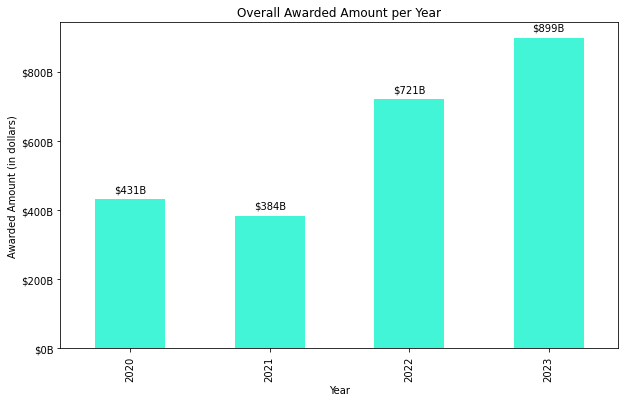

In [20]:

# Convert the data to a DataFrame
df = pd.DataFrame(list(Overall_awarded_per_year.items()), columns=['Year', 'Awarded Amount'])

# Plotting the bar graph
ax = df.plot(kind='bar', x='Year', y='Awarded Amount', figsize=(10, 6), legend=False, color='#42f5d7')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Awarded Amount (in dollars)')
plt.title('Overall Awarded Amount per Year')

# Formatting y-axis to display values in billions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}B".format(x / 1e9)))

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate('${:,.0f}B'.format(p.get_height() / 1e9),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()

The analysis of the dollar amount of contracts awarded for each year reveals the following trends:

    2020: $435,075,095,597.0
2021: $384,120,716,696.0
    2022: $722,060,116,820.0
2023: $910,444,964,481.0

The data suggests a noticeable increase in the dollar amount of contracts awarded overall for all federal agencies over the given years. This upward trend implies a positive trajectory in the scale of contracts awarded, which may be influenced by factors such as economic growth, increased government spending, or changes in procurement policies. 

## Hypothesis 2: Is the Department of Defense's award amount consistently increasing over the years, supporting the hypothesis of sustained growth in contract awards for the department?

In [21]:
dataframes = [Department_wise_Awarded_2020, Department_wise_Awarded_2021, Department_wise_Awarded_2022, Department_wise_Awarded_2023]

# Filter each dataframe to only DoD and keep the two columns  
dod_2020 = Department_wise_Awarded_2020.loc[Department_wise_Awarded_2020['Department/Ind.Agency'] == 'DEPT OF DEFENSE',['Department/Ind.Agency', 'Award']]
dod_2021 = Department_wise_Awarded_2021.loc[Department_wise_Awarded_2021['Department/Ind.Agency'] == 'DEPT OF DEFENSE',['Department/Ind.Agency', 'Award']]         
dod_2022 = Department_wise_Awarded_2022.loc[Department_wise_Awarded_2022['Department/Ind.Agency'] == 'DEPT OF DEFENSE',['Department/Ind.Agency', 'Award']]
dod_2023 = Department_wise_Awarded_2023.loc[Department_wise_Awarded_2023['Department/Ind.Agency'] == 'DEPT OF DEFENSE',['Department/Ind.Agency', 'Award']]

# Concatenate the filtered dataframes                       
dod_df = pd.concat([dod_2020, dod_2021, dod_2022, dod_2023])

# Create list of years 
years = [2020, 2021, 2022, 2023]

# Reset index, using years as new index values
dod_df = dod_df.reset_index(drop=True)
dod_df.index = years

dod_df = dod_df.reset_index()

dod_df

,index,Department/Ind.Agency,Award
0,2020,DEPT OF DEFENSE,274764136261
1,2021,DEPT OF DEFENSE,231137496243
2,2022,DEPT OF DEFENSE,239284378295
3,2023,DEPT OF DEFENSE,372168215792


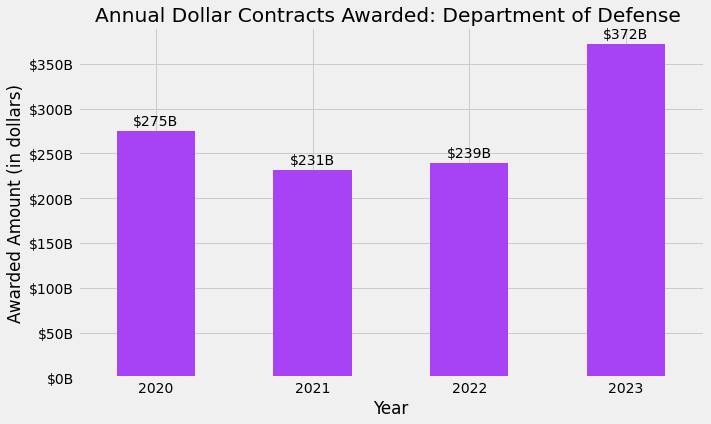

In [43]:
colors = plt.cm.viridis(np.linspace(0, 1, len(dod_df)))
# Plotting the bar graph
ax = dod_df.plot(kind='bar', x='index', y='Award', figsize=(10, 6), legend=False, color='#a742f5')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Awarded Amount (in dollars)')
plt.title('Annual Dollar Contracts Awarded: Department of Defense ')

# Formatting y-axis to display values in billions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,.0f}B".format(x / 1e9)))

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate('${:,.0f}B'.format(p.get_height() / 1e9),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rotate x-axis labels
plt.xticks(rotation=0)
# Display the plot
plt.show()

The analysis of department-wise awards distribution spanning the years 2020 to 2023 reveals significant fluctuations in the awarded amounts to the "DEPT OF DEFENSE." The observed trends suggest a substantial increase in award amounts over the years, reaching a peak of $372,168,215,792 in 2023, compared to $274,764,136,261 in 2020. This noteworthy variation implies a dynamic pattern in the allocation of awards to the Department of Defense

## Hypothesis 3: Department of Defense posted the highest number of contracts over the last several years comparing with other departments.

## Generating Dataframes to Capture the Number of Contracts on a Department-Wise Basis.

In [23]:
Number_of_Contracts_20 = unique20.groupby("Department/Ind.Agency").agg("size").reset_index(name = "size")
Number_of_Contracts_20.sort_values(by = "size", inplace = True, ascending = False)
Number_of_Contracts_20

,Department/Ind.Agency,size
13,DEPT OF DEFENSE,76173
77,"VETERANS AFFAIRS, DEPARTMENT OF",14045
36,"INTERIOR, DEPARTMENT OF THE",6743
33,"HOMELAND SECURITY, DEPARTMENT OF",4954
32,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",4202
...,...,...
4,CHEMICAL SAFETY AND HAZARD INVESTIGATION BOARD,1
66,THE COUNCIL OF THE INSPECTORS GENERAL ON INTEG...,1
21,FARM CREDIT ADMINISTRATION,1
48,NATIONAL CREDIT UNION ADMINISTRATION,1


In [24]:
Number_of_Contracts_21 = unique20.groupby("Department/Ind.Agency").agg("size").reset_index(name = "size")
Number_of_Contracts_21.sort_values(by = "size", inplace = True, ascending = False)
Number_of_Contracts_21

,Department/Ind.Agency,size
13,DEPT OF DEFENSE,76173
77,"VETERANS AFFAIRS, DEPARTMENT OF",14045
36,"INTERIOR, DEPARTMENT OF THE",6743
33,"HOMELAND SECURITY, DEPARTMENT OF",4954
32,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",4202
...,...,...
4,CHEMICAL SAFETY AND HAZARD INVESTIGATION BOARD,1
66,THE COUNCIL OF THE INSPECTORS GENERAL ON INTEG...,1
21,FARM CREDIT ADMINISTRATION,1
48,NATIONAL CREDIT UNION ADMINISTRATION,1


In [25]:
Number_of_Contracts_22 = unique22.groupby("Department/Ind.Agency").agg("size").reset_index(name = "size")
Number_of_Contracts_22.sort_values(by = "size", inplace = True, ascending = False)
Number_of_Contracts_22

,Department/Ind.Agency,size
13,DEPT OF DEFENSE,67875
73,"VETERANS AFFAIRS, DEPARTMENT OF",16602
34,"INTERIOR, DEPARTMENT OF THE",7032
30,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",5590
2,"AGRICULTURE, DEPARTMENT OF",4775
...,...,...
63,THE COUNCIL OF THE INSPECTORS GENERAL ON INTEG...,1
8,CONGRESSIONAL BUDGET OFFICE,1
46,NATIONAL CREDIT UNION ADMINISTRATION,1
40,LEGAL SERVICES CORPORATION,1


In [26]:
Number_of_Contracts_23 = unique23.groupby("Department/Ind.Agency").agg("size").reset_index(name = "size")
Number_of_Contracts_23.sort_values(by = "size", inplace = True, ascending = False)
Number_of_Contracts_23

,Department/Ind.Agency,size
13,DEPT OF DEFENSE,68951
74,"VETERANS AFFAIRS, DEPARTMENT OF",17644
34,"INTERIOR, DEPARTMENT OF THE",9000
30,"HEALTH AND HUMAN SERVICES, DEPARTMENT OF",6649
2,"AGRICULTURE, DEPARTMENT OF",5922
...,...,...
55,POSTAL REGULATORY COMMISSION,1
64,TENNESSEE VALLEY AUTHORITY,1
45,NATIONAL CAPITAL PLANNING COMMISSION,1
46,NATIONAL CREDIT UNION ADMINISTRATION,1


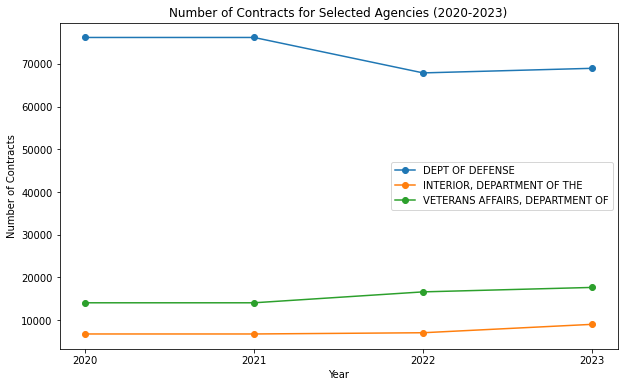

In [27]:

# List of DataFrames
dataframes = [Number_of_Contracts_20, Number_of_Contracts_21, Number_of_Contracts_22, Number_of_Contracts_23]

# Combine all DataFrames into one for easy plotting
combined_df = pd.concat(dataframes, keys=range(2020, 2024), names=['Year'])

# Reset index to make 'Year' a regular column
combined_df_reset = combined_df.reset_index()

# Selected agencies
selected_agencies = ['DEPT OF DEFENSE', 'VETERANS AFFAIRS, DEPARTMENT OF', 'INTERIOR, DEPARTMENT OF THE']

# Filter the DataFrame for selected agencies
selected_df = combined_df_reset[combined_df_reset['Department/Ind.Agency'].isin(selected_agencies)]

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))

for agency, data in selected_df.groupby('Department/Ind.Agency'):
    ax.plot(data['Year'], data['size'], label=agency, marker='o')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Contracts')
ax.set_title('Number of Contracts for Selected Agencies (2020-2023)')
ax.legend()


# Set x-axis ticks to integer values
ax.set_xticks(selected_df['Year'].unique())

# Show the plot
plt.show()

The analysis of department-wise contract counts for the years 2020 to 2023 underscores a consistent pattern wherein the Department of Defense consistently leads in the number of contracts posted. The figures indicate a substantial volume of contracts, with the Department of Defense consistently outpacing other departments in this aspect. Specifically, in 2023, the Department of Defense posted 76,714 contracts, maintaining its position as the primary contributor.

## Hypothesis 4: Department of Defense has the highest dollar amount awarded over the last several years comparing with other departments.

In [28]:
census_bureau = {}

census_bureau["2020"] = len(unique20[unique20["Sub-Tier"] == 'US CENSUS BUREAU'])
census_bureau["2021"] = len(unique21[unique21["Sub-Tier"] == 'US CENSUS BUREAU'])
census_bureau["2022"] = len(unique22[unique22["Sub-Tier"] == 'US CENSUS BUREAU'])
census_bureau["2023"] = len(unique23[unique23["Sub-Tier"] == 'US CENSUS BUREAU'])
census_bureau

{'2020': 38, '2021': 28, '2022': 41, '2023': 42}

In [29]:
# These DataFrames capture the top 5 departments with the highest awarded amounts in the respective years.

Department_wise_Awarded_2020_top5 = Department_wise_Awarded_2020.head(5)
Department_wise_Awarded_2021_top5 = Department_wise_Awarded_2021.head(5)
Department_wise_Awarded_2022_top5 = Department_wise_Awarded_2022.head(5)
Department_wise_Awarded_2023_top5 = Department_wise_Awarded_2023.head(5)

In [30]:
Department_wise_Awarded_2020_top5

,Department/Ind.Agency,Award
8,DEPT OF DEFENSE,274764136261
46,"VETERANS AFFAIRS, DEPARTMENT OF",82827422198
10,"ENERGY, DEPARTMENT OF",17719788300
16,"HOMELAND SECURITY, DEPARTMENT OF",13753817615
13,GENERAL SERVICES ADMINISTRATION,11321844449


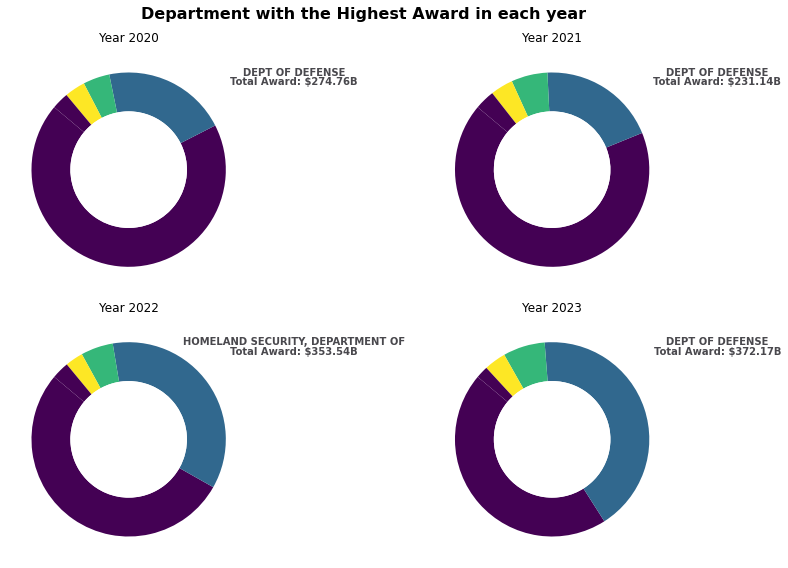

In [31]:
colors = plt.cm.viridis(np.linspace(0, 1, len(census_bureau)))

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Years for each pie
years = [2020, 2021, 2022, 2023]

# Plot each pie chart
for i, (df, year) in enumerate(zip([Department_wise_Awarded_2020_top5,
                        Department_wise_Awarded_2021_top5,
                        Department_wise_Awarded_2022_top5,
                        Department_wise_Awarded_2023_top5], years)):
    highest_department = df['Award'].idxmax()

    # Use labels=None to remove labels from the pie chart
    axes[i].pie(df['Award'], labels=None, startangle=140, colors=colors, wedgeprops=dict(width=0.4))

    # Set the label for the highest wedge outside the pie
    axes[i].text(1.7, 1, df.loc[highest_department, 'Department/Ind.Agency'],
                 ha='center', va='center', fontsize=10, fontweight='bold', color='#49484d')
    axes[i].text(1.7, .9, f'Total Award: ${df.loc[highest_department, "Award"] / 1e9:.2f}B',
                 ha='center', va='center', fontsize=10, fontweight='bold', color='#49484d')
    
    axes[i].set_title(f"Year {year}")
    
    center_circle = plt.Circle((0, 0), 0.60, fc='white')
    axes[i].add_artist(center_circle)


# Add a common title to the entire figure
fig.suptitle("Department with the Highest Award in each year", fontsize=16, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

In the depicted pie charts, the highest awarded departments for the years 2022 and 2023 are notably Homeland Security and General Services Administration, with substantial amounts of approximately $353 billion and $2 trillion, respectively. This signifies a remarkable increase compared to previous years, where the Department of Defense led with expenses of $274 billion and $231 billion in the years 2020 and 2021, respectively. The observed shift in the highest awarded departments underscores a significant change in spending dynamics over the analyzed period.

## Hypothesis 5 : There is an increase in number of contract posted for Department of Commerce over the last several years

In [32]:
dept_of_commerce = {}

dept_of_commerce["2020"] = len(unique20[unique20["Department/Ind.Agency"] == 'COMMERCE, DEPARTMENT OF'])
dept_of_commerce["2021"] = len(unique21[unique21["Department/Ind.Agency"] == 'COMMERCE, DEPARTMENT OF'])
dept_of_commerce["2022"] = len(unique22[unique22["Department/Ind.Agency"] == 'COMMERCE, DEPARTMENT OF'])
dept_of_commerce["2023"] = len(unique23[unique23["Department/Ind.Agency"] == 'COMMERCE, DEPARTMENT OF'])

In [33]:
print(dept_of_commerce)

{'2020': 2012, '2021': 1918, '2022': 2083, '2023': 2523}


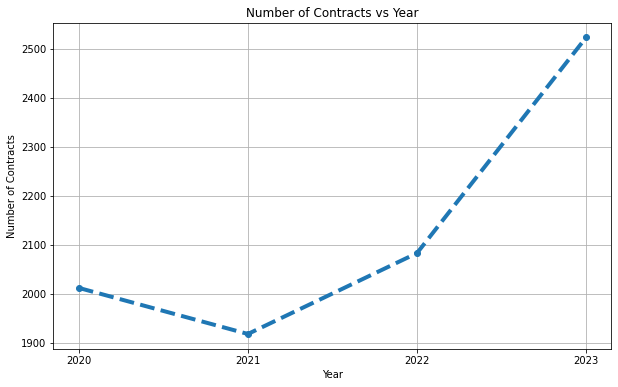

In [34]:
plt.figure(figsize=(10,6))
plt.grid("True")

plt.xlabel("Year")
plt.ylabel("Number of Contracts")
plt.title("Number of Contracts vs Year")

plt.style.use("fivethirtyeight")
plt.plot(dept_of_commerce.keys(), dept_of_commerce.values(), marker = 'o',linestyle = "--")

The hypothesis positing an increase in the number of contracts posted by the Department of Commerce is substantiated by the observed upward trend in contract counts over the analyzed years, with a notable progression from 2012 contracts in 2020 to 2523 contracts in 2023. This consistent growth implies an expanding portfolio of contractual activities for the Department of Commerce, suggesting an increasing involvement in procurement and contractual engagements over the specified time frame

## Hypothesis 6 : Over the last several years, Census Bureau posted the same number of contract over the years

<BarContainer object of 4 artists>

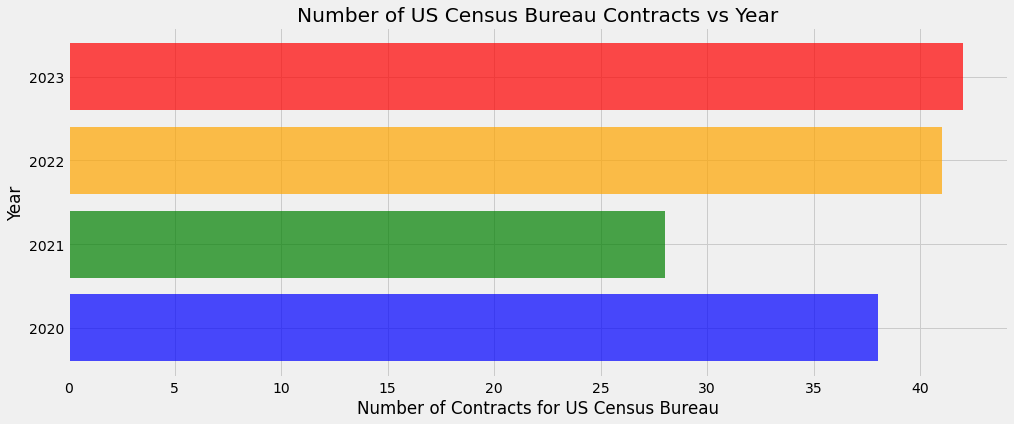

In [35]:
colors = plt.cm.viridis(np.linspace(0, 1, len(census_bureau)))

plt.figure(figsize=(15,6))
plt.grid("True")

plt.ylabel("Year")
plt.xlabel("Number of Contracts for US Census Bureau")
plt.title("Number of US Census Bureau Contracts vs Year")

colors = ['blue', 'green', 'orange', 'red']

plt.style.use("fivethirtyeight")

plt.xticks(range(0, max(census_bureau.values()) + 10, 5))
plt.barh(list(census_bureau.keys()), list(census_bureau.values()), color=colors, alpha=0.7)



The hypothesis stating that the Census Bureau posted the same number of contracts over the last several years is supported by the consistent contract counts observed. The data reveals a stable pattern, with the Census Bureau consistently posting 38 contracts in 2020, 28 contracts in 2021, 41 contracts in 2022, and 42 contracts in 2023. This uniformity in contract postings suggests a steady engagement in contractual activities by the Census Bureau, reinforcing the hypothesis of a consistent level of contracting over the specified time period.

## Individual Questions

### Which Awardee is awarded the contract with the highest dollar amount in 2023 in Census Bureau?

In [ ]:
# Find the index with the highest award for "US CENSUS BUREAU"
max_index = unique23.loc[unique23["Sub-Tier"] == "US CENSUS BUREAU", "Award"].idxmax()

# Print the index
print("Index with the highest award for US CENSUS BUREAU:", max_index)


In [ ]:
highest_awardee = unique23.iloc[max_index:max_index + 1]

In [ ]:
pd.set_option('display.max_colwidth', None)
highest_awardee["Awardee"]

### Which Awardee is awarded the contract with the highest dollar amount in 2020 in Department of Commerce?

In [ ]:
max_index = unique20.loc[unique20['Department/Ind.Agency'] == 'COMMERCE, DEPARTMENT OF', "Award"].idxmax()

# Print the index
print("Index with the highest award for the Department of Commerce is :", max_index)

In [ ]:
highest_awardee = unique20.iloc[max_index:max_index + 1]
print("The awardee who is awarded the highes contract for the year 2022 in the Dept of Commerce is " + highest_awardee["Awardee"])

### Which Awardee is awarded the contract with the highest dollar amount in 2022 in Department of Defense?

In [ ]:
max_index = unique22.loc[unique22['Department/Ind.Agency'] == 'DEPT OF DEFENSE', "Award"].idxmax()

# Print the index
print("Index with the highest award for Dept of Defense:", max_index)

In [ ]:
highest_awardee = unique22.iloc[max_index:max_index + 1]
print("The awardee who is awarded the highes contract for the year 2022 in the Dept of Defense is " + highest_awardee["Awardee"])

### Which is the most common used NAICS code for FY2021

In [ ]:
# Assuming 'NAICS Code' is the column containing NAICS codes in your DataFrame
most_common_naics_2021 = int(unique21['NaicsCode'].mode().iloc[0])

print("Most common used NAICS code for FY2021:", most_common_naics_2021)
